In [8]:
import mne
import pandas as pd
import matplotlib as plt
import EntropyHub as EH
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle

# CALCULATION of r

r = 0.2 * mean(vector with the standard deviation of all the signals of that channel)

In [6]:
path_before = "subjects_before/cropped"
path_during = "subjects_during"

list_before = glob.glob(os.path.join(path_before, "*.fif"))
names_before = [os.path.basename(file_before) for file_before in list_before]

list_during = glob.glob(os.path.join(path_during, "*.edf"))
names_during = [os.path.basename(file_during) for file_during in list_during]


std_channel = {channel: [] for channel in ['EEG Fp1','EEG Fp2','EEG F3','EEG F4', 'EEG F7', 'EEG F8','EEG T3', 'EEG T4',  'EEG C3', 'EEG C4', 'EEG T5',
                                         'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz','EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']}  

for names_before, names_during in zip(names_before, names_during):
    
    if names_before.endswith('.fif') and names_during.endswith('.edf'):
        raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
        raw_during = mne.io.read_raw_edf(os.path.join(path_during, names_during), preload=True)
    else:
        raise ValueError(f"Unsupported format for the file. Only .edf and .fif are valid.")
        
    # Obtain channel list
    channels = raw_before.ch_names 
    
    # Calculate r for each chanel
    for channel in channels:

        channel_before = raw_before.get_data(picks=channel)[0]
        channel_during = raw_during.get_data(picks=channel)[0] 
        
        # Calculate the standard deviation of both segments
        std_before = np.std(channel_before)
        std_during = np.std(channel_during)

        # Add the standard deviations to the corresponding list
        std_channel[channel].append((std_before, std_during))
        
        """std_por_canal = {
    'EEG Fp1': [(std_before_1, std_during_1), (std_before_2, std_during_2), ...],
    'EEG Fp2': [(std_before_1, std_during_1), (std_before_2, std_during_2), ...], ...
        }"""

results_r = {}

for channel, stds in std_channel.items():
    # We extract the standard deviations of all patients
    std_before_list = [std_before for std_before, _ in stds]
    std_during_list = [std_during for _, std_during in stds]

    # Calculate the mean of the standard deviations for the "before" and "during" segments
    mean_std_before = np.mean(std_before_list)
    mean_std_during = np.mean(std_during_list)

    mean_std_total = np.mean([mean_std_before, mean_std_during])
 
    # Calculate r as 0.2 * std_mean
    r = 0.2 * mean_std_total

    # Store the result in the dictionary
    results_r[channel] = r

        
for channel, r_value in results_r.items():
    print(f"Channel: {channel}, r: {r_value}")

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)


Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Re

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject02_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject03_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject04_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject05_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject07_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject08_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject09_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject10_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject11_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject12_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject13_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject14_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject15_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject16_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject17_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject18_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject19_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject20_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject21_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject22_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject23_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject24_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject25_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject26_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject27_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject28_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject29_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject30_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject31_2.edf...
EDF file detected
Sett

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject32_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject33_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject34_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject35_2.edf...
EDF 

C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2949198216.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_before = mne.io.read_raw_fif(os.path.join(path_before, names_before), preload=True)


# Sample Entropy of a patient in the first channel

In [16]:
import mne
import EntropyHub as EH

path = "subjects_during/Subject00_2.edf"
raw = mne.io.read_raw_edf(path, preload=True)


channel_eeg = raw.get_data('EEG Fp1')
list_eeg = channel_eeg.tolist()
list_new = list_eeg[0]
list_new_1 = list_new[0:15500] 
list_new_2 = list_new[15500:31000] 


# Calculate Sample Entropy for the entire signal
Samp1, _, _ = EH.SampEn(list_new_1, m=2, tau=1)
Samp2, _, _ = EH.SampEn(list_new_2, m=2, tau=1)

# Extract the value of SampEn
Samp_good1 = Samp1[-1]  # we select for m=2 by Samp1[-1]
Samp_good2 = Samp2[-1]
total = (Samp_good1 + Samp_good2)/2
print(Samp_good1)
print(Samp_good2)
print(total)

Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
0.40322906831465344
0.34863951892811534
0.3759342936213844


# Sample Entropy of a patient in the first channel with NEW VALUE of r

In [18]:
import mne
import EntropyHub as EH

path = "subjects_during/Subject00_2.edf"
raw = mne.io.read_raw_edf(path, preload=True)


channel_eeg = raw.get_data('EEG Fp1')
list_eeg = channel_eeg.tolist()
list_new = list_eeg[0]
list_new_1 = list_new[0:15500] 
list_new_2 = list_new[15500:31000] 

# Obtain value of r
r_value = results_r['EEG Fp1']

# Calculate Sample Entropy for the entire signal
Samp1, _, _ = EH.SampEn(list_new_1, m=2, tau=1, r = r_value)
Samp2, _, _ = EH.SampEn(list_new_2, m=2, tau=1, r = r_value)

# Extract the value of SampEn
Samp_good1 = Samp1[-1]  # we select for m=2 by Samp1[-1]
Samp_good2 = Samp2[-1]
total = (Samp_good1 + Samp_good2)/2
print(Samp_good1)
print(Samp_good2)
print(total)

Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
0.5243457693014608
0.47325867389350135
0.4988022215974811


# Sample Entropy values for O2 channel

## BEFORE

In [44]:
import os
import glob
import mne

path_before = "subjects_before/cropped"

list_before = glob.glob(os.path.join(path_before, "*.fif"))
names_before = [os.path.basename(file_before) for file_before in list_before]


# List to store the SampEn for the O2 channel
sum_before = []

for patient in names_before:
    
    path_completed = f"{path_before}\\{patient}"
    raw = mne.io.read_raw_fif(path_completed, preload=True)

    channel_eeg = raw.get_data('EEG O2')
    list_eeg = channel_eeg.tolist()
    list_new = list_eeg[0]
    list_new_1= list_new[0:15500] 
    list_new_2= list_new[15500:31000] 
    
    # Obtaiin r value
    r_value = results_r['EEG O2']
    
    # Calculate Sample Entropy for the entire signal
    Samp1, _, _ = EH.SampEn(list_new_1, m=2, tau=1, r = r_value)
    Samp2, _, _ = EH.SampEn(list_new_2, m=2, tau=1, r = r_value)
    
    # Extract the value of SampEn
    Samp_good1 = Samp1[-1]
    Samp_good2 = Samp2[-1]
    total = (Samp_good1 + Samp_good2)/2
    
    sum_before.append(total)
                

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_7540\2589437543.py:17: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path_completed, preload=True)


### Save results BEFORE O2

In [47]:
import numpy as np
import pickle
import os

save_path = 'sample_before_results.pkl'

if os.path.exists(save_path):
    # Load saved results
    with open(save_path, 'rb') as f:
        sum_before = pickle.load(f)
    print("Results loaded from file.")
    
else:
    with open(save_path, 'wb') as f:
        pickle.dump(sum_before, f)
    print("Results calculated and saved to file.")


Results loaded from file.


### Distribution of values BEFORE

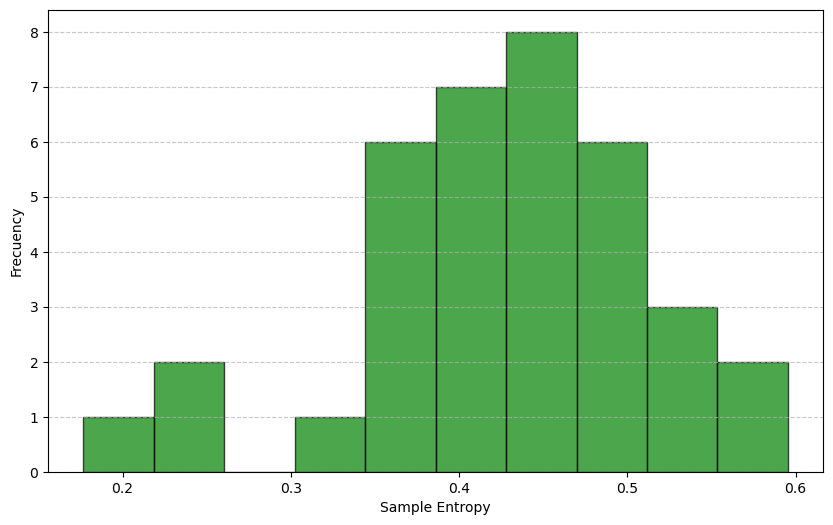

In [49]:
pkl_file_path = 'sample_before_results.pkl'

with open(pkl_file_path, 'rb') as file:
    sample_before = pickle.load(file)


plt.figure(figsize=(10, 6))
plt.hist(sample_before, bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Sample Entropy')
plt.ylabel('Frecuency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("distrib_sample_before.png", dpi=300)  # Save figure

plt.show()

## DURING

In [57]:
import os
import glob
import mne
import matplotlib.pyplot as plt

path_during = "subjects_during"

list_during = glob.glob(os.path.join(path_during, "*.edf"))
names_during = [os.path.basename(file_during) for file_during in list_during]

# List to store the SampEn for the O2 channel
sum_during = []

for patient in names_during:
    
    path_completed = f"{path_during}\\{patient}"
    raw = mne.io.read_raw_edf(path_completed, preload=True)

    channel_eeg = raw.get_data('EEG O2')
    list_eeg = channel_eeg.tolist()
    list_new = list_eeg[0]
    list_new_1 = list_new[0:15500] 
    list_new_2 = list_new[15500:31000] 
    
    # Obtaiin r value
    r_value = results_r['EEG O2']
    
    # Calculate Sample Entropy for the entire signal
    Samp1, _, _ = EH.SampEn(list_new_1, m=2, tau=1, r = r_value)
    Samp2, _, _ = EH.SampEn(list_new_2, m=2, tau=1, r = r_value)
    
    # Extract the value of SampEn
    Samp_good1 = Samp1[-1]
    Samp_good2 = Samp2[-1]
    total = (Samp_good1 + Samp_good2)/2
    
    sum_during.append(total)

Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject02_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting

### Save results DURING O2

In [3]:
import numpy as np
import pickle
import os

save_path = 'sample_during_results.pkl'

if os.path.exists(save_path):
    # Load saved results
    with open(save_path, 'rb') as f:
        sum_during = pickle.load(f)
    print("Results loaded from file.")
    
else:
    with open(save_path, 'wb') as f:
        pickle.dump(sum_during, f)
    print("Results calculated and saved to file.")

Results loaded from file.


### Distribution of values DURING

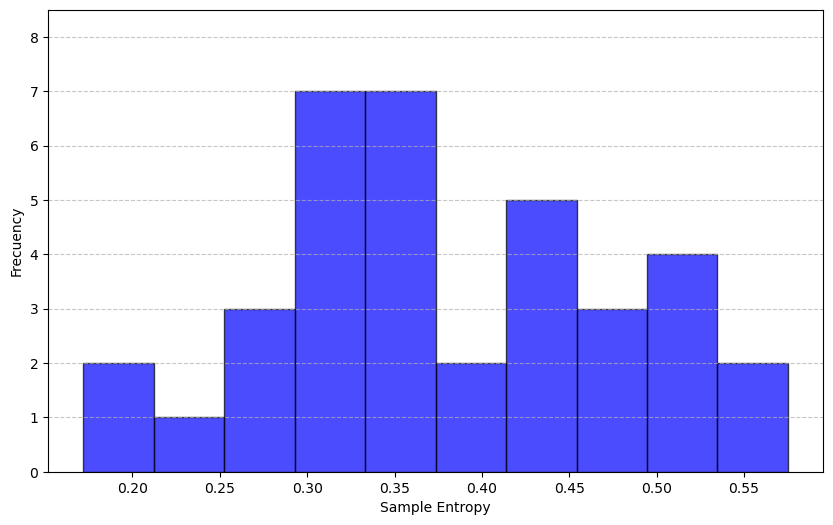

In [14]:
pkl_file_path = 'sample_during_results.pkl'

with open(pkl_file_path, 'rb') as file:
    sample_during = pickle.load(file)


plt.figure(figsize=(10, 6))
plt.hist(sample_during, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Sample Entropy')
plt.ylabel('Frecuency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 8.5)
plt.savefig("distrib_sample_during.png", dpi=300)  # Save figure
plt.show()

# Shapiro-Wilk test

## BEFORE

In [63]:
import pickle
from scipy.stats import shapiro

pkl_file_path = 'sample_before_results.pkl'

with open(pkl_file_path, 'rb') as file:
    sample_before = pickle.load(file)

# Shapiro-Wilk test
stat, p = shapiro(sample_before) 
if p > 0.05:
    print("The data follow a normal distribution, p-value:", p, "stat:", stat)
else:
    print("The data do NOT follow a normal distribution, p-value:", p, "stat:", stat)

The data follow a normal distribution, p-value: 0.09315248206523048 stat: 0.9484044778271464


## DURING

In [65]:
import pickle
from scipy.stats import shapiro

pkl_file_path = 'sample_during_results.pkl'

with open(pkl_file_path, 'rb') as file:
    sample_during = pickle.load(file)

# Shapiro-Wilk test
stat, p = shapiro(sample_during) 
if p > 0.05:
    print("The data follow a normal distribution, p-value:", p, "stat:", stat)
else:
    print("The data do NOT follow a normal distribution, p-value:", p, "stat:", stat)

The data follow a normal distribution, p-value: 0.6667187045795148 stat: 0.9776829310761703


# Paired t-test

In [67]:
import numpy as np
from scipy.stats import ttest_rel

stat, p = ttest_rel(sample_before, sample_during)

if p < 0.05:
    print("There is a significant difference between the groups, p-value:", p, "stat:", stat)
else:
    print("There is NO sufficient evidence of a significant difference, p-value:", p, "stat:", stat)

There is a significant difference between the groups, p-value: 4.793386639096394e-05 stat: 4.635939110535973


# Box plots

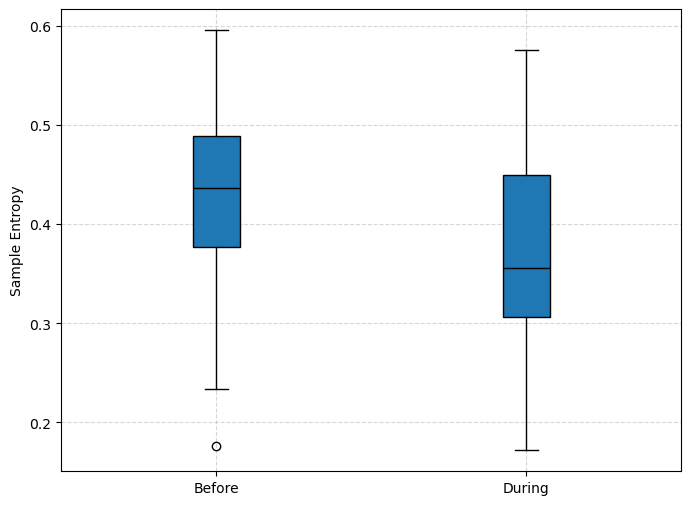

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot([sample_before, sample_during],
            labels=["Before", "During"],
            patch_artist=True,
            medianprops={"color": "black"})

plt.ylabel("Sample Entropy")
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig("boxplot_sample.png", dpi=300)  # Save figure
plt.show()

# Sample Entropy comparison on every channel

# Sample Entropy function

In [71]:
import mne
import EntropyHub as EH

def sample_entropy(file_path):
    
    if file_path.endswith('.edf'):
        raw = mne.io.read_raw_edf(file_path, preload=True)
    elif file_path.endswith('.fif'):
        raw = mne.io.read_raw_fif(file_path, preload=True)
    else:
        raise ValueError(f"Unsupported format for file {file_path}. Only .edf and .fif are valid.")

    channels = raw.ch_names

    results = {}

    for channel in channels:
        if channel not in results_r:
            print(f"The value r is not available for channel: {channel}. Make sure all channels are in 'r_results'.")
    
        channel_eeg = raw.get_data(picks=channel)
        
        # Convert data in a list 
        list_eeg = channel_eeg.tolist()
        
        list_new= list_eeg[0]
        
        
        list_new_1 = list_new[0:15500] 
        list_new_2= list_new[15500:31000] 
        
        # Get the value of r for the channel
        r_value = results_r[channel]
        
        # Calculate Sample Entropy for the entire signal
        Samp1, _, _ = EH.SampEn(list_new_1, m=2, tau=1, r = r_value)
        Samp2, _, _ = EH.SampEn(list_new_2, m=2, tau=1, r = r_value)
        
        # Extract the value of SampEn
        Samp_good1 = Samp1[-1]
        Samp_good2 = Samp2[-1]
        total = (Samp_good1 + Samp_good2)/2
        
        results[channel] = {
                "sample_entropy": total,
            }

    return results


# BEFORE

In [5]:
import glob
import os

path_before = "subjects_before/cropped"

list_before = glob.glob(os.path.join(path_before, "*.fif"))
names_before = [os.path.basename(file_before) for file_before in list_before]

# Dictionary to store results of all patients before
results_before = {}

for patient in names_before:
    path_completed = os.path.join(path_before, patient)
    results_before[patient] = sample_entropy(path_completed)

for patient, results in results_before.items():
    print(f"\nResults for {patient}:")
    for channel, values in results.items():
        sample = values['sample_entropy']
        print(f"  Channel: {channel} - Sample Entropy: {sample}")

Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


C:\Users\pablo\AppData\Local\Temp\ipykernel_21684\3299329028.py:9: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)



Results for Subject00_1_recortado.fif:
  Channel: EEG Fp1 - Sample Entropy: 0.4368723534485945
  Channel: EEG Fp2 - Sample Entropy: 0.46631202466934224
  Channel: EEG F3 - Sample Entropy: 0.534154564373784
  Channel: EEG F4 - Sample Entropy: 0.5289948972278447
  Channel: EEG F7 - Sample Entropy: 0.5365513584034913
  Channel: EEG F8 - Sample Entropy: 0.5302117401869053
  Channel: EEG T3 - Sample Entropy: 0.5625566114832249
  Channel: EEG T4 - Sample Entropy: 0.5113937250267881
  Channel: EEG C3 - Sample Entropy: 0.5248957728373524
  Channel: EEG C4 - Sample Entropy: 0.5219742440185535
  Channel: EEG T5 - Sample Entropy: 0.5302056090306997
  Channel: EEG T6 - Sample Entropy: 0.5623797399366892
  Channel: EEG P3 - Sample Entropy: 0.4917602056731174
  Channel: EEG P4 - Sample Entropy: 0.512652016912603
  Channel: EEG O1 - Sample Entropy: 0.49114282510796137
  Channel: EEG O2 - Sample Entropy: 0.5285571057250944
  Channel: EEG Fz - Sample Entropy: 0.5197971000615389
  Channel: EEG Cz - Sam

### Save results in every channel BEFORE

In [73]:
import numpy as np
import pickle
import os

save_path = 'all_channels_before.pkl'

if os.path.exists(save_path):
    # Load saved results
    with open(save_path, 'rb') as f:
        results_before = pickle.load(f)
    print("Results loaded from file.")
else:
    with open(save_path, 'wb') as f:
        pickle.dump(results_before, f)
    print("Results calculated and saved to file.")


Results loaded from file.


# DURING

In [10]:
import glob
import os

path_during = "subjects_during"

list_during = glob.glob(os.path.join(path_during, "*.edf"))
names_during = [os.path.basename(file_during) for file_during in list_during]

# Dictionary to store results of all patients during
results_during = {}

for patient in names_during:
    path_completed = os.path.join(file_during, patient)
    results_during[patient] = sample_entropy(path_completed)

for patient, results in results_during.items():
    print(f"Results for {patient}:")
    for channel, values in results.items():
        sample = values['sample_entropy']
        print(f"  Channel: {channel} - Sample Entropy: {sample}")


Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_durante\Subject02_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting

### Save results in every channel DURING

In [78]:
import numpy as np
import pickle
import os

save_path = 'all_channels_during.pkl'

if os.path.exists(save_path):
    # Load saved results
    with open(save_path, 'rb') as f:
        results_during = pickle.load(f)
    print("Results loaded from file.")
    
else:
    with open(save_path, 'wb') as f:
        pickle.dump(results_during, f)
    print("Results calculated and saved to file.")

Results loaded from file.


# Histograms BEFORE vs DURING

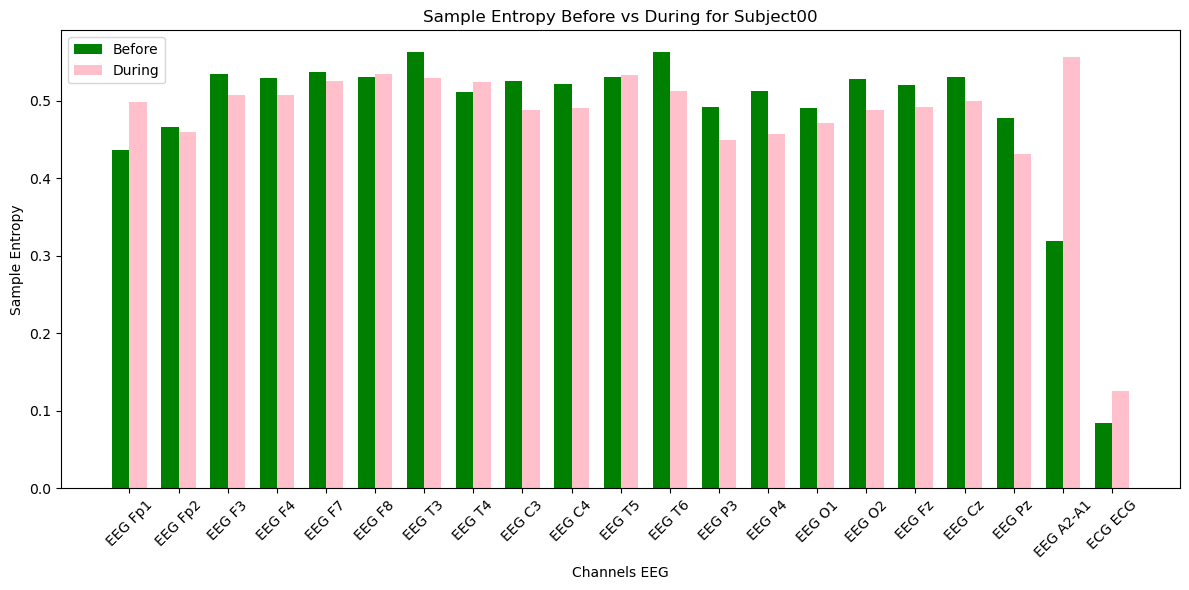

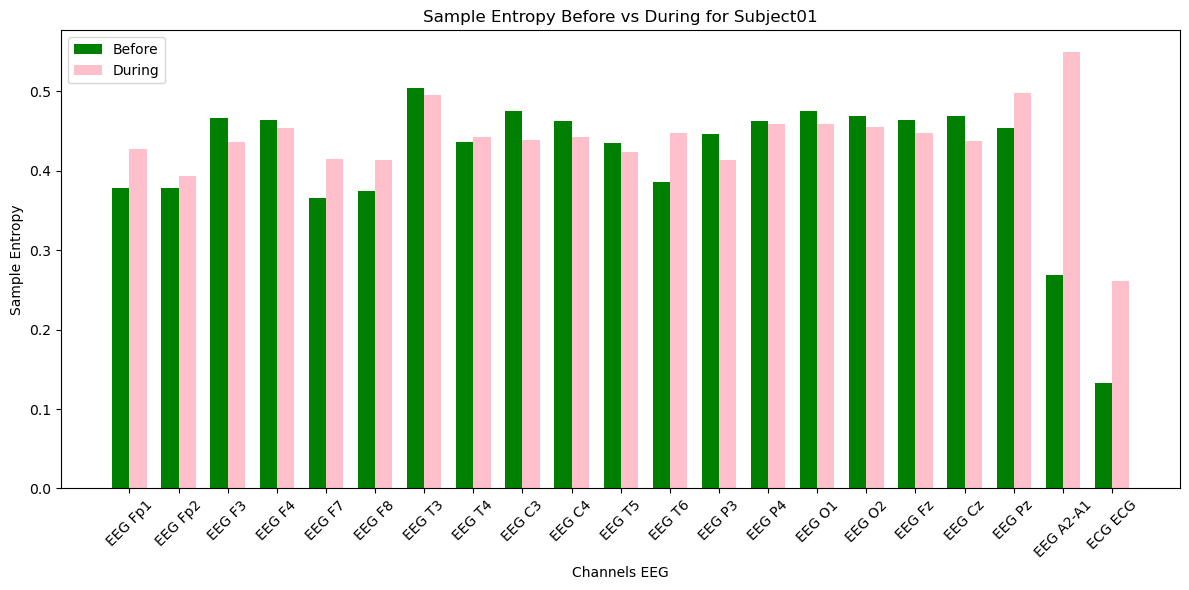

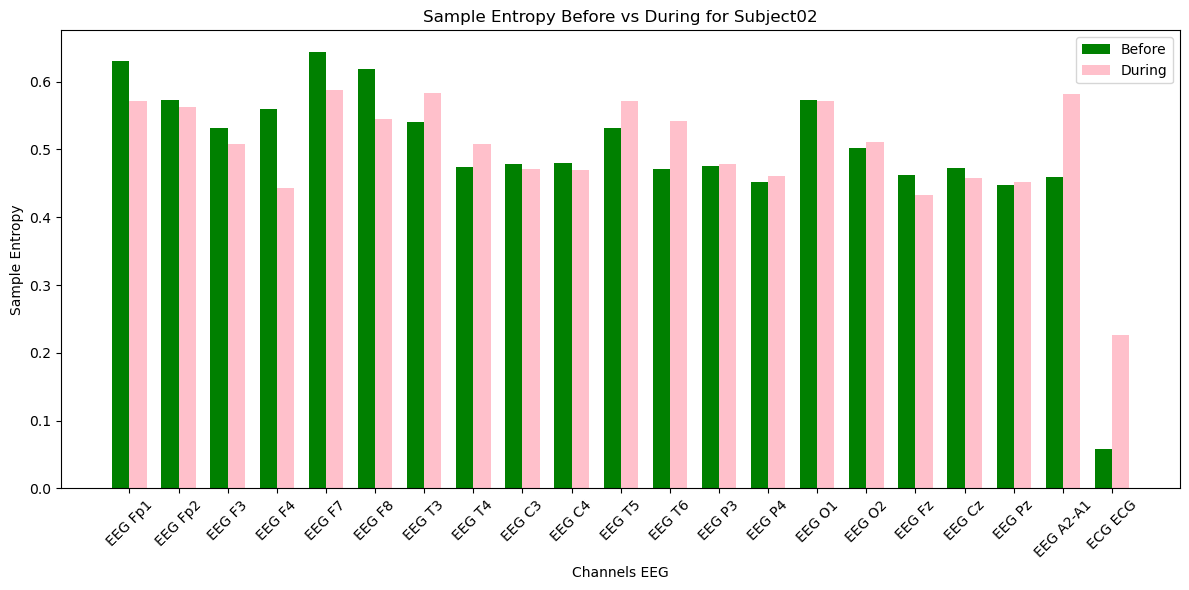

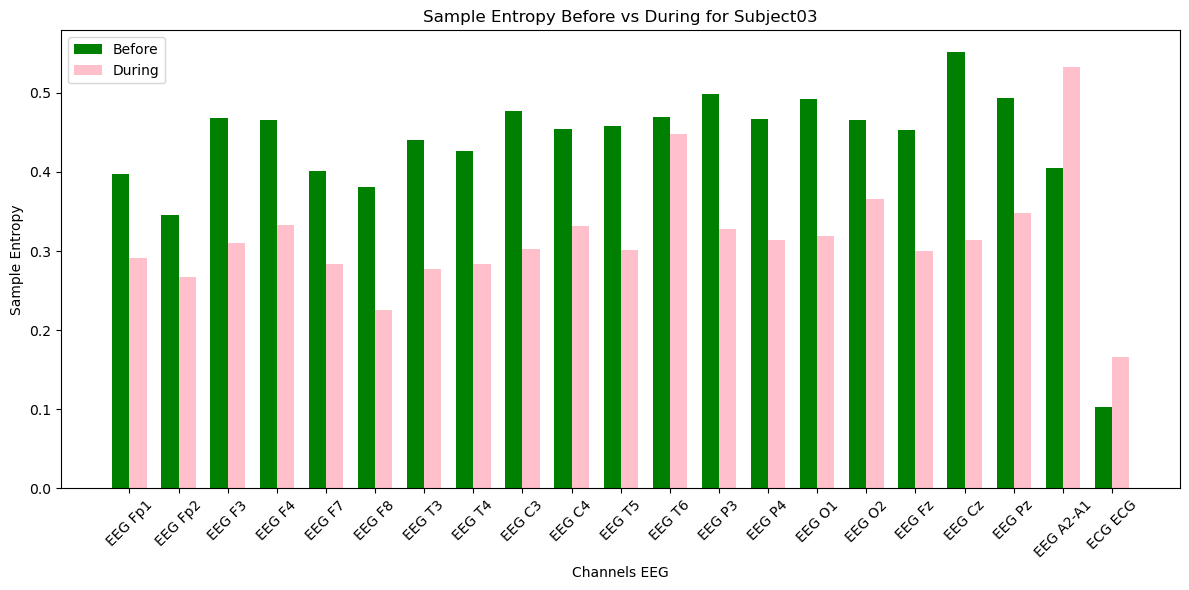

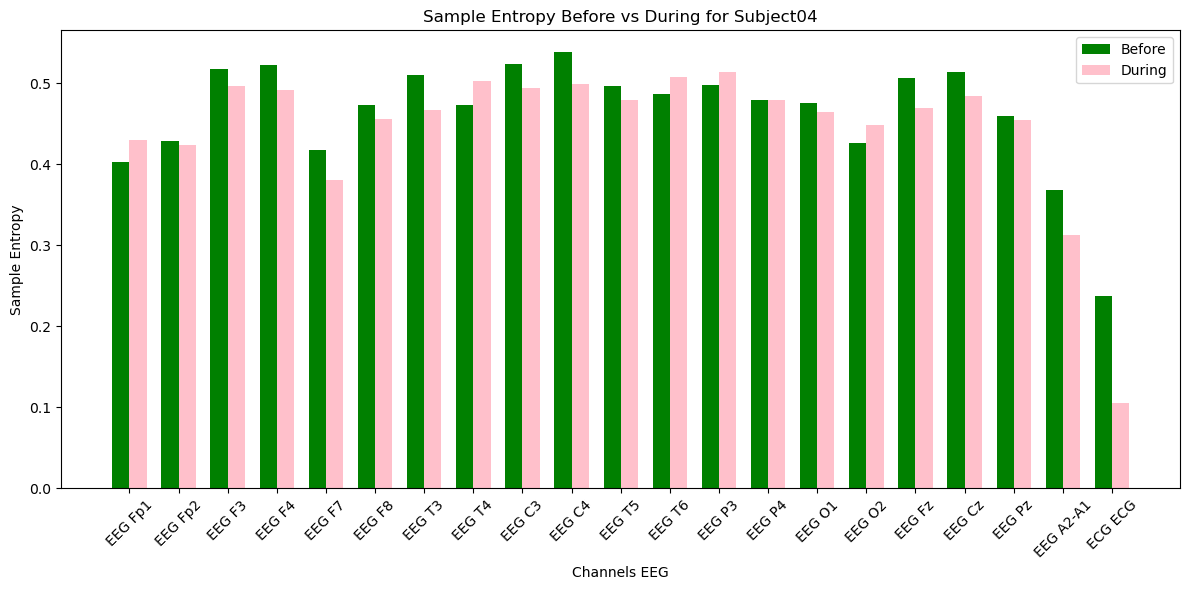

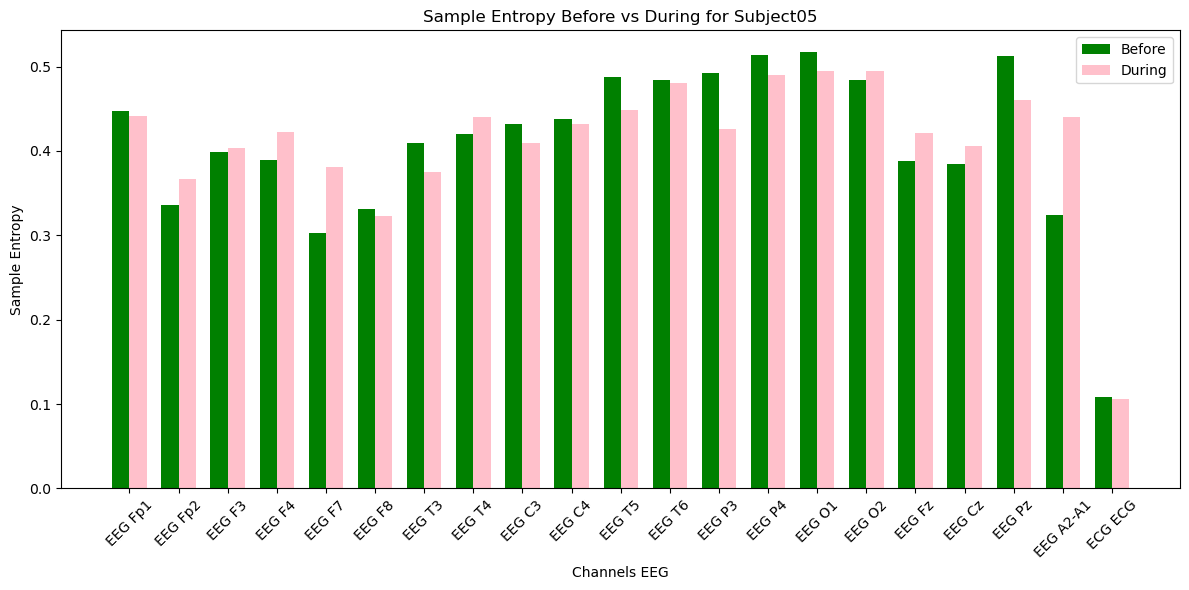

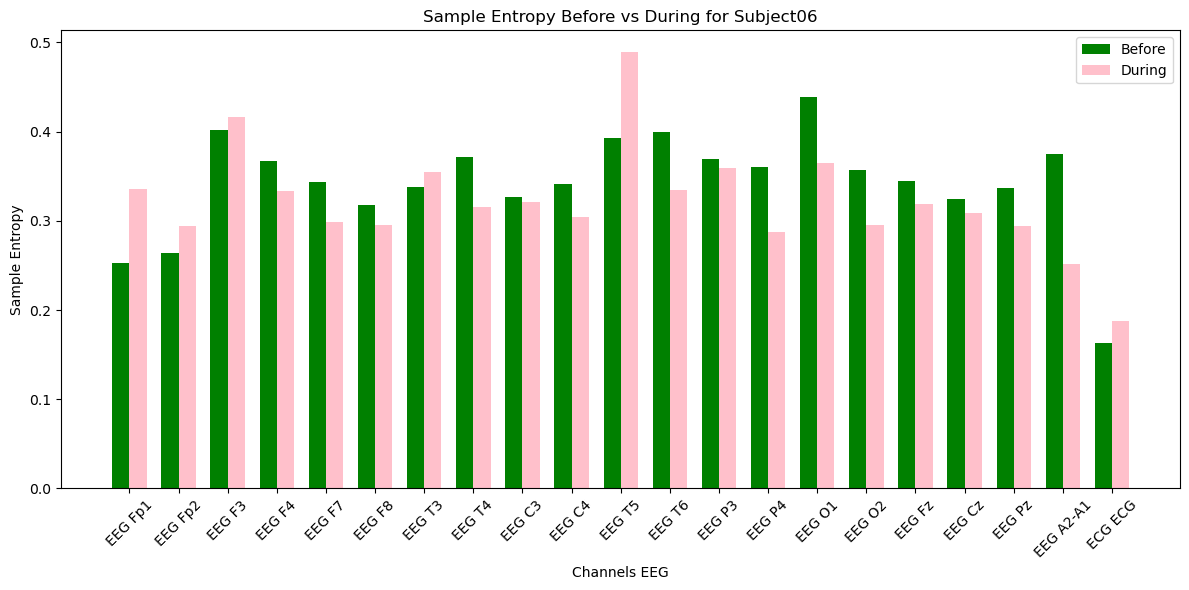

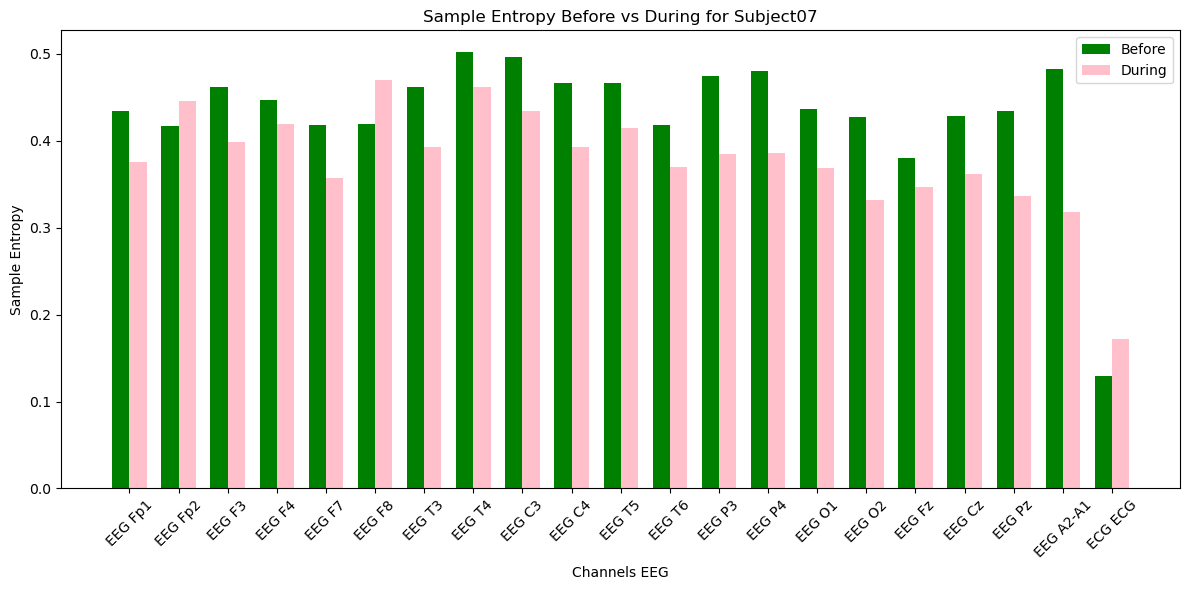

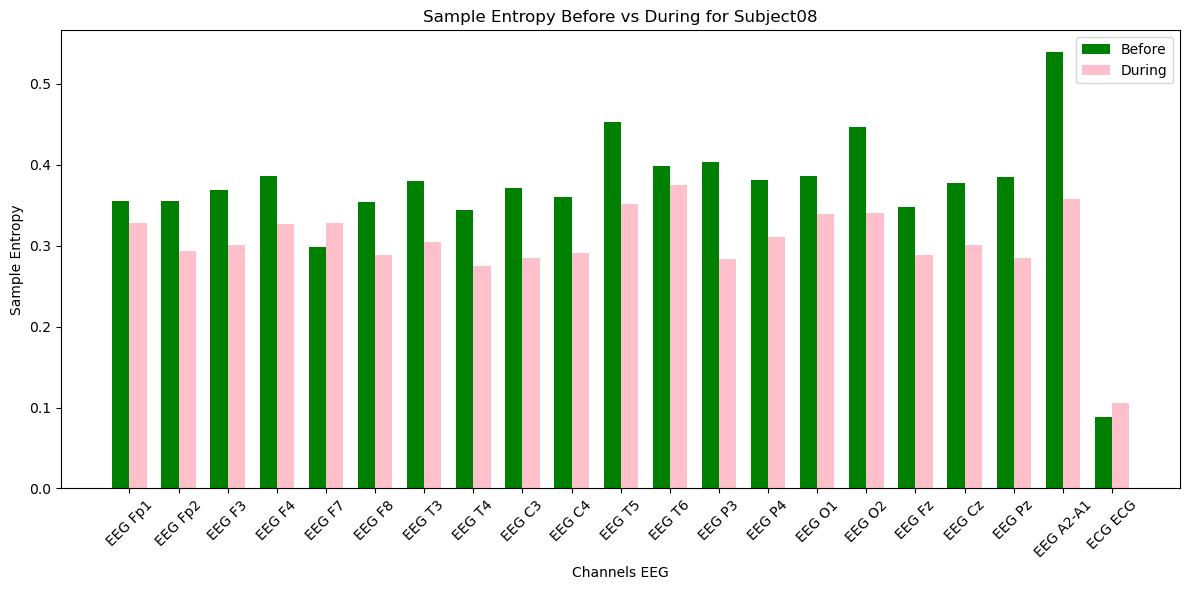

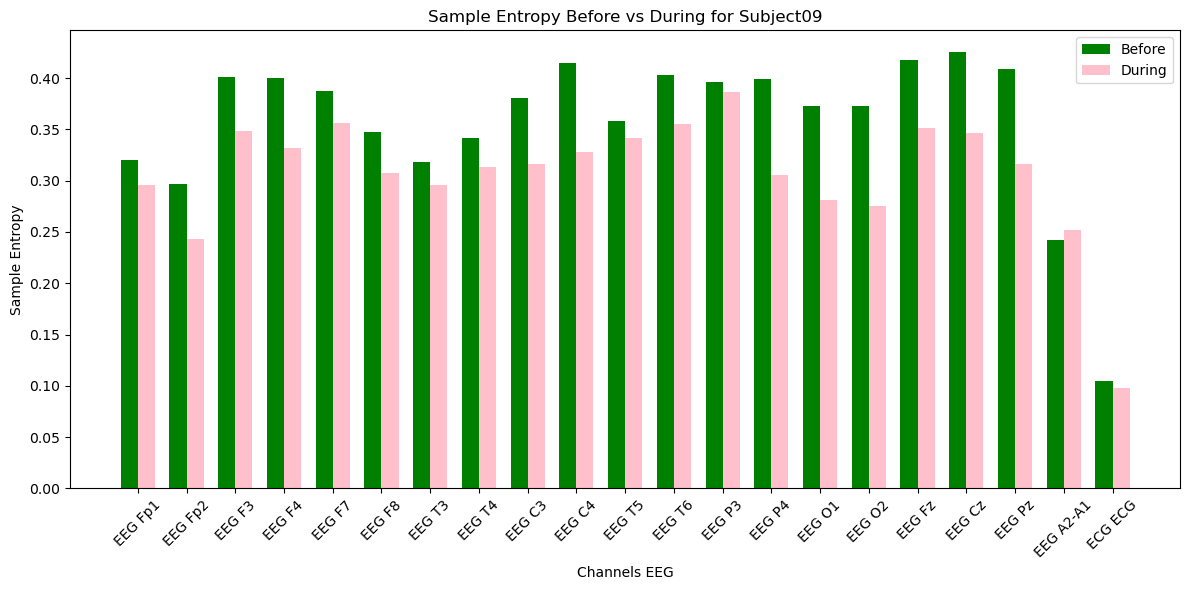

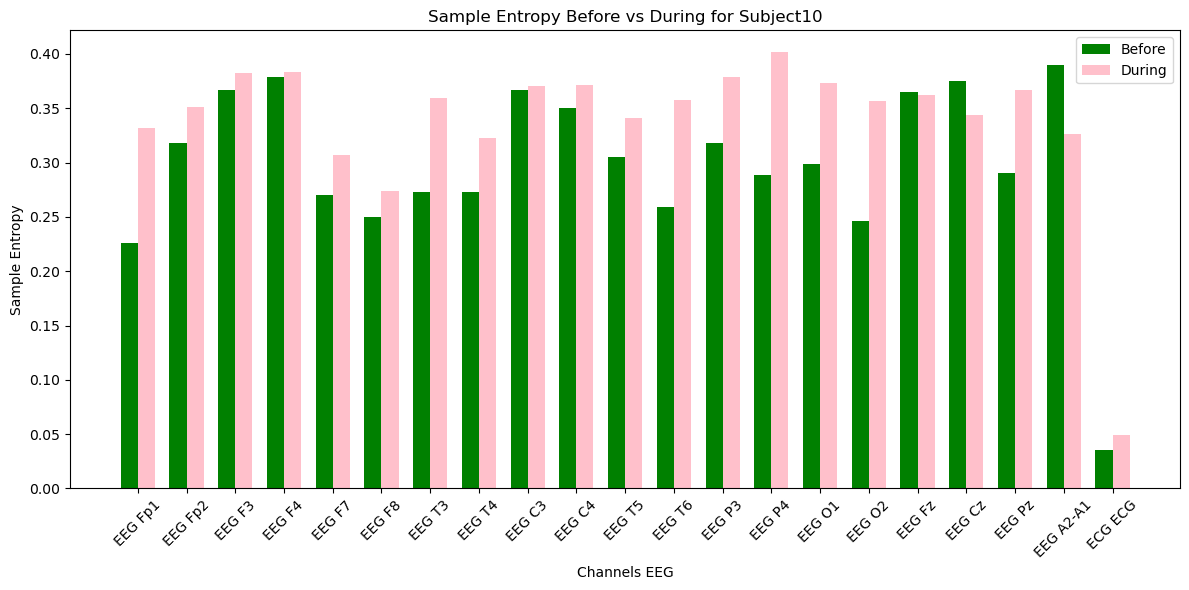

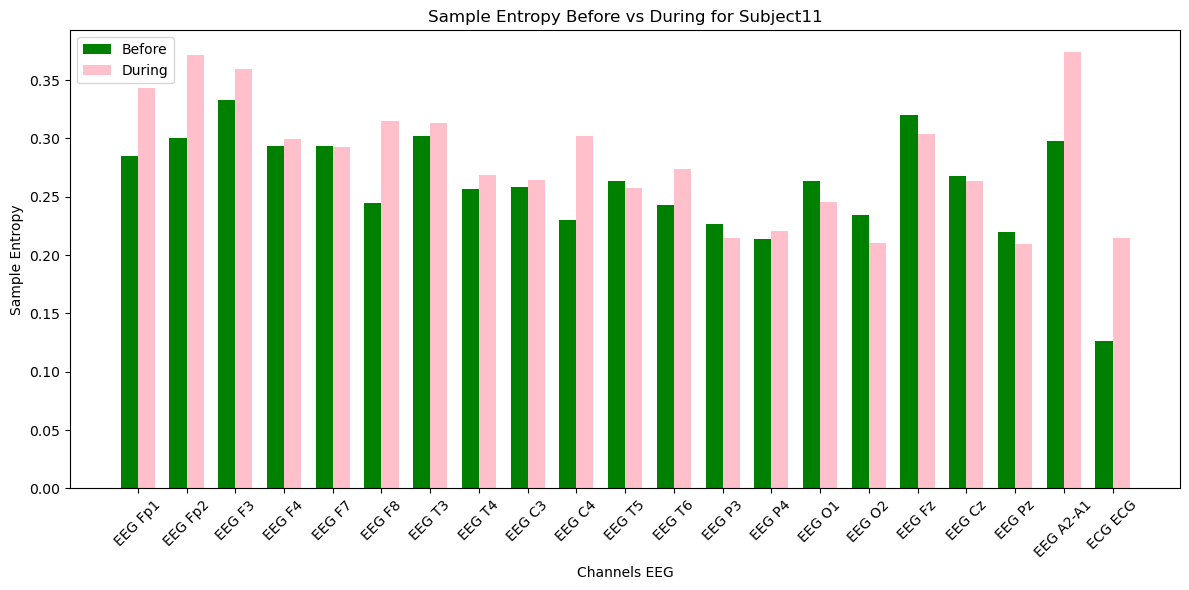

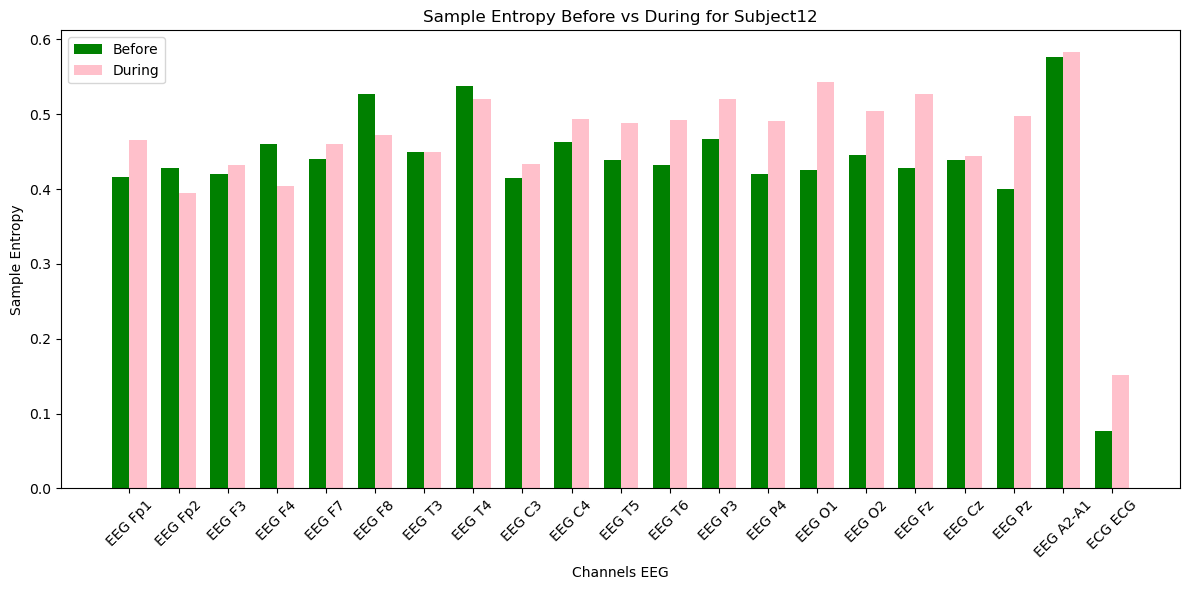

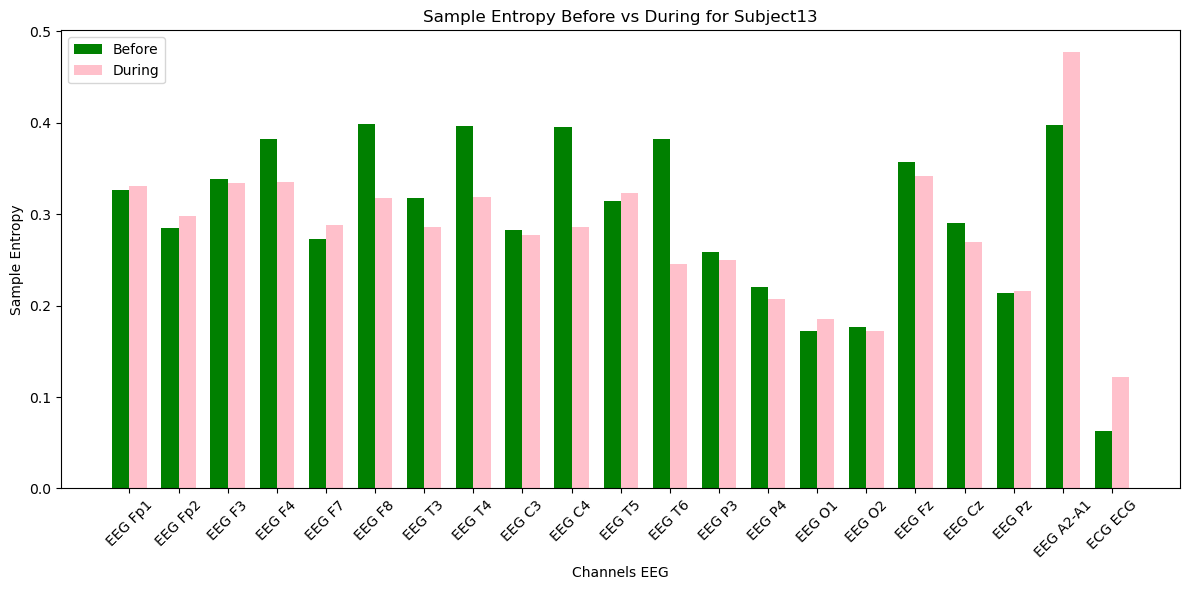

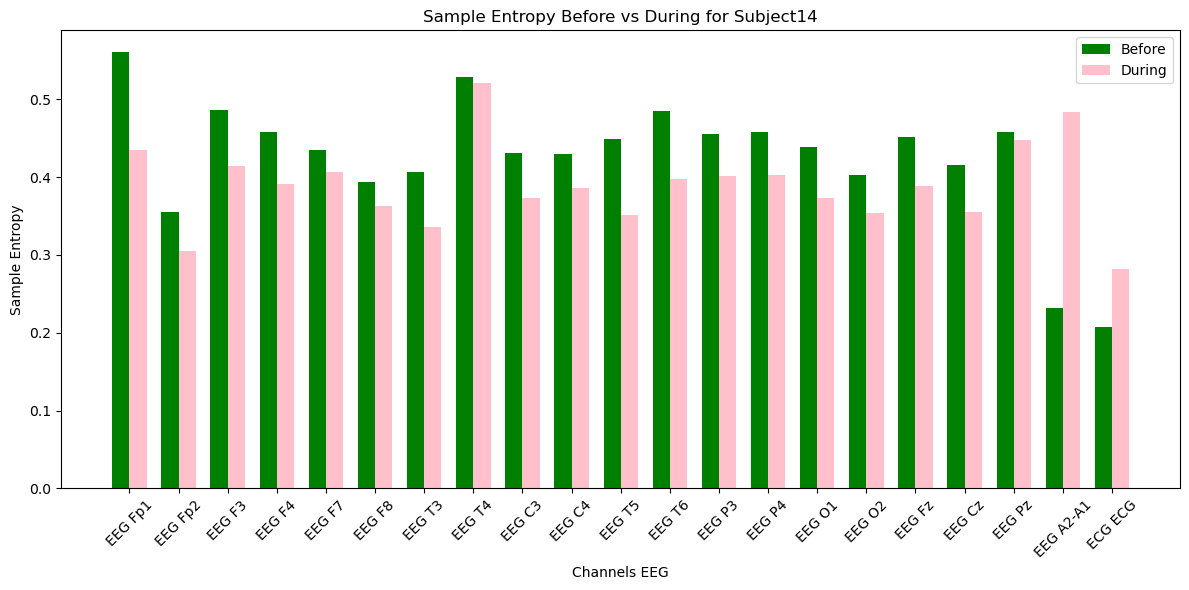

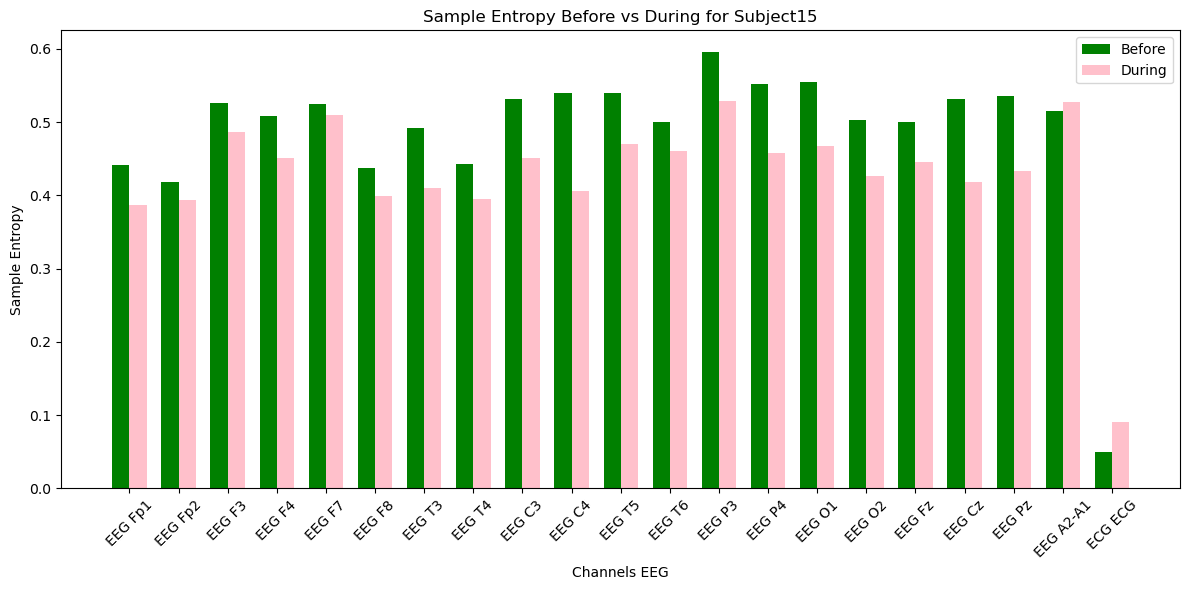

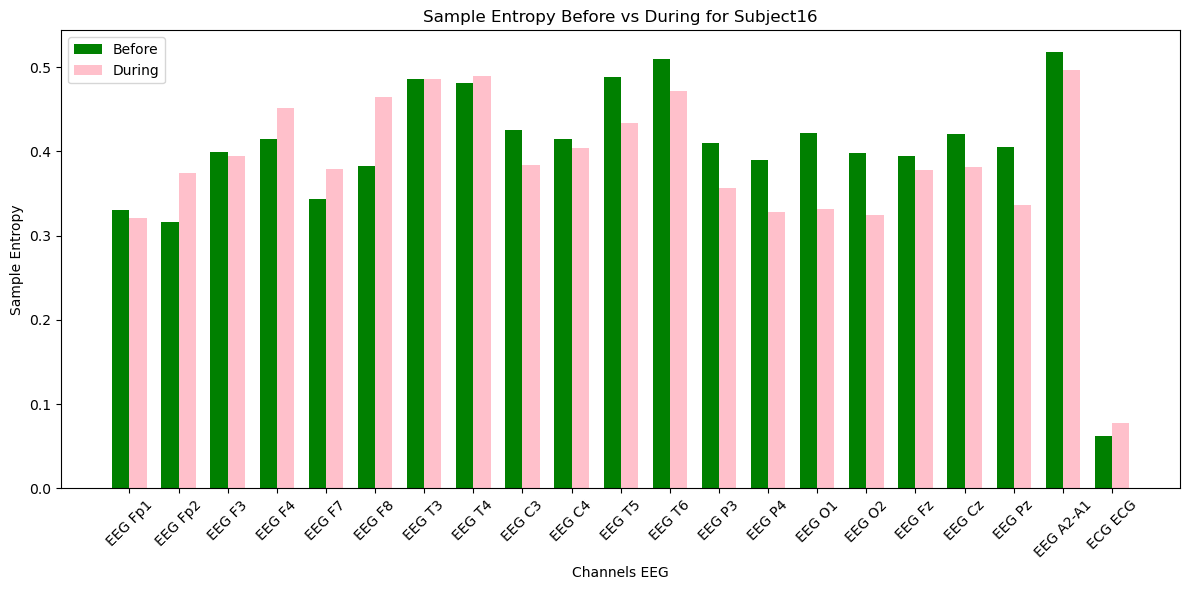

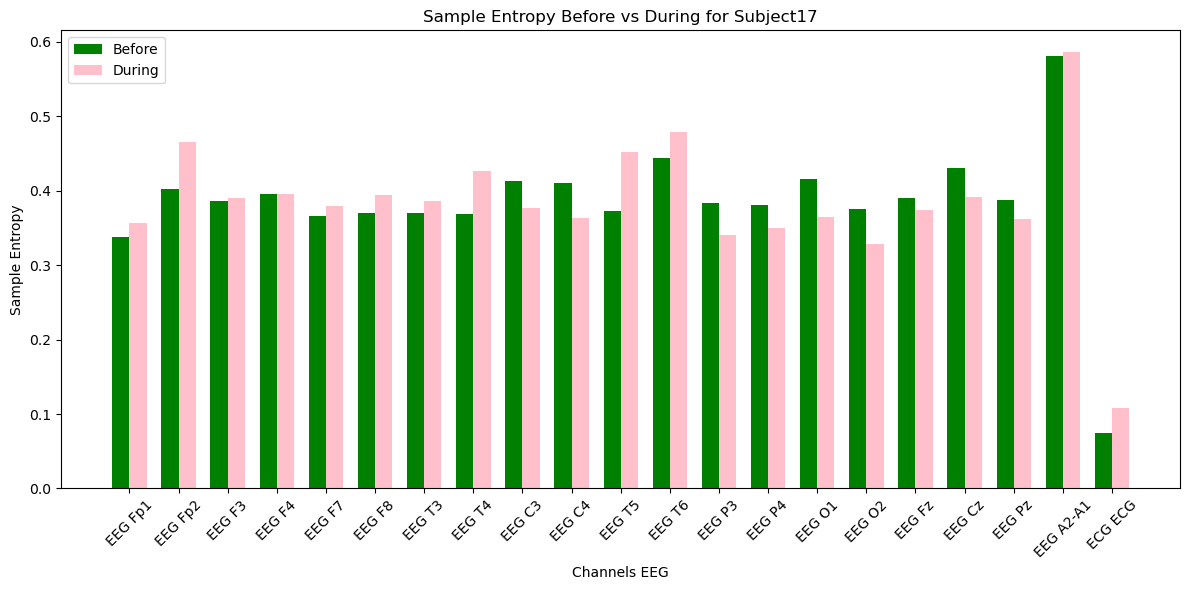

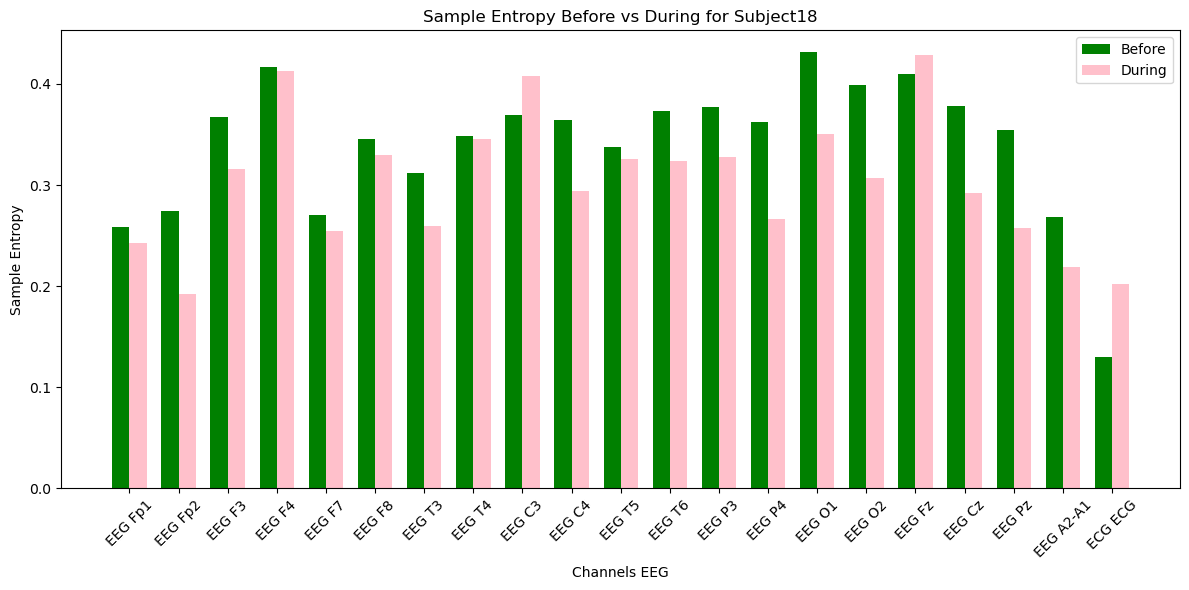

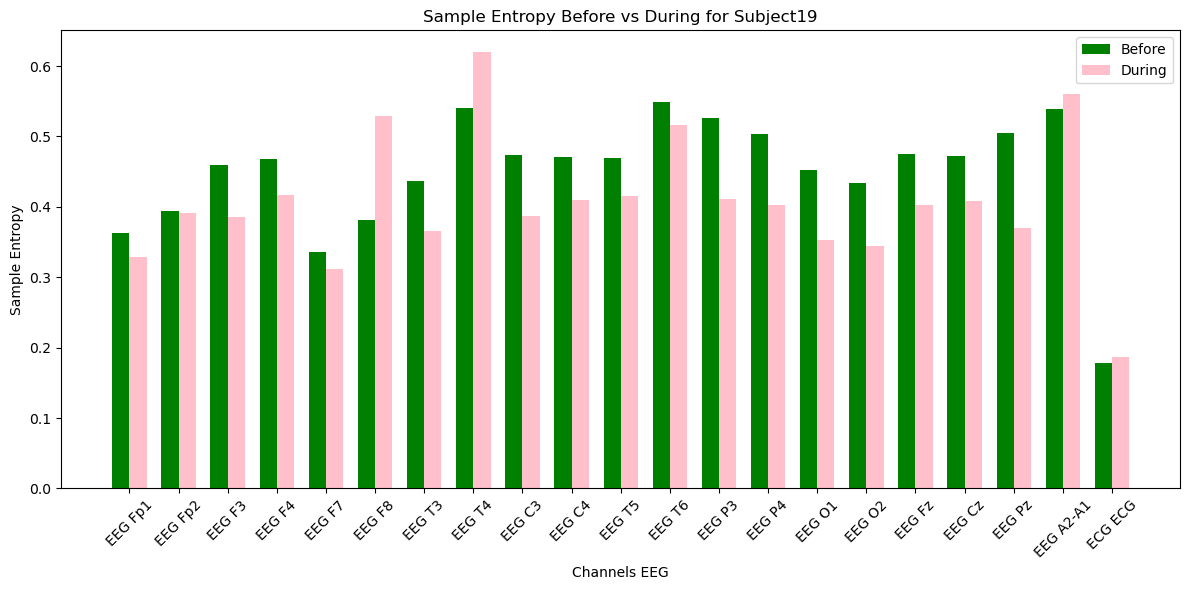

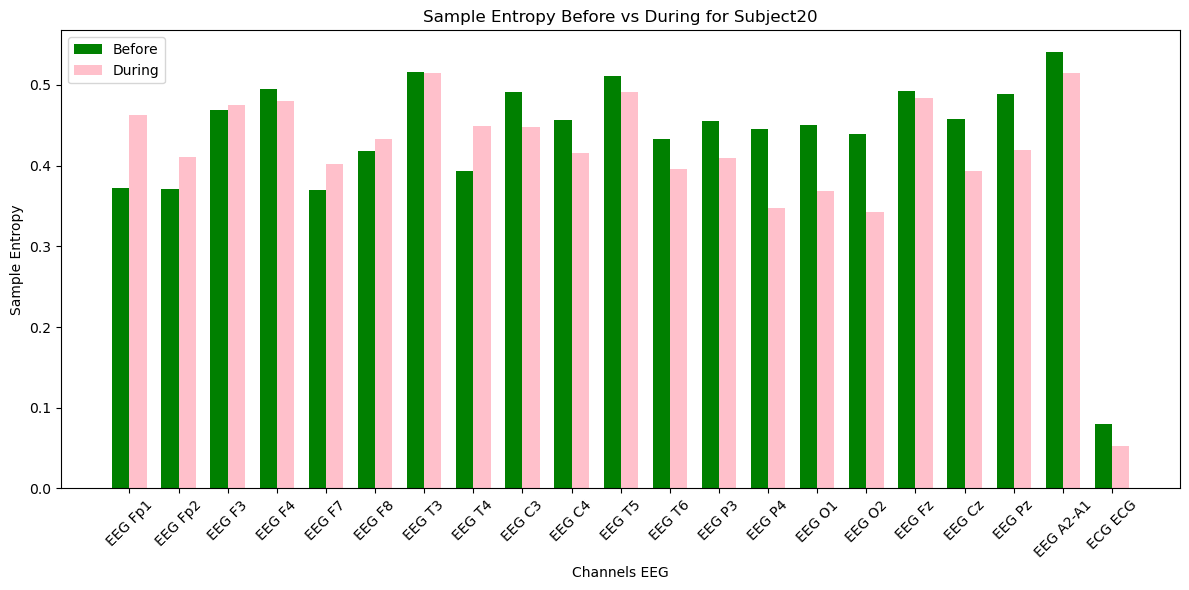

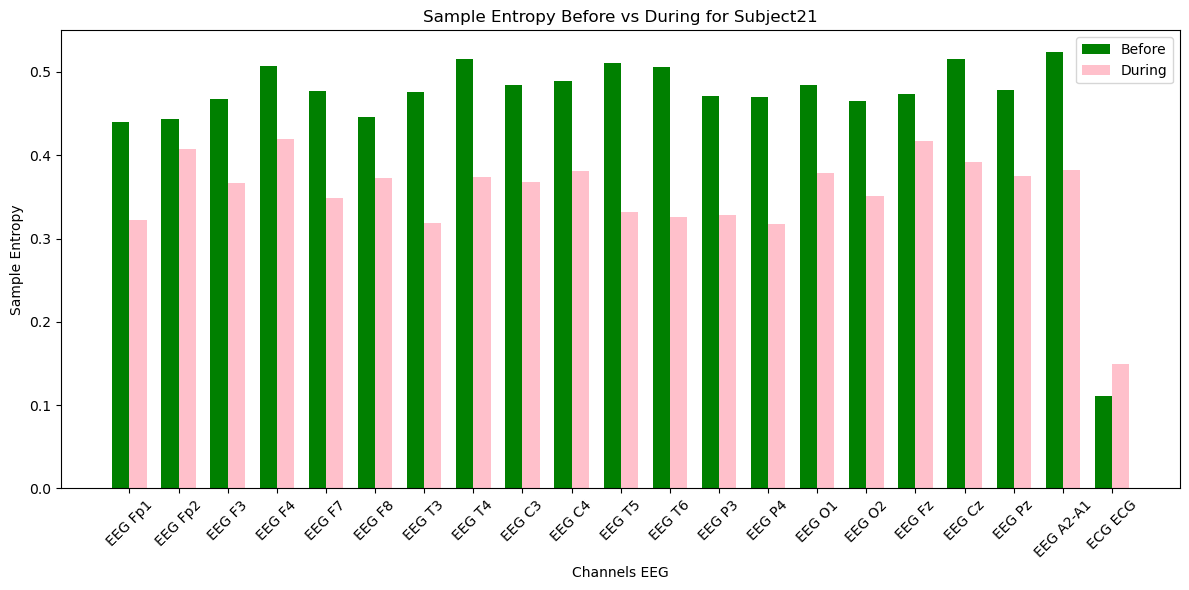

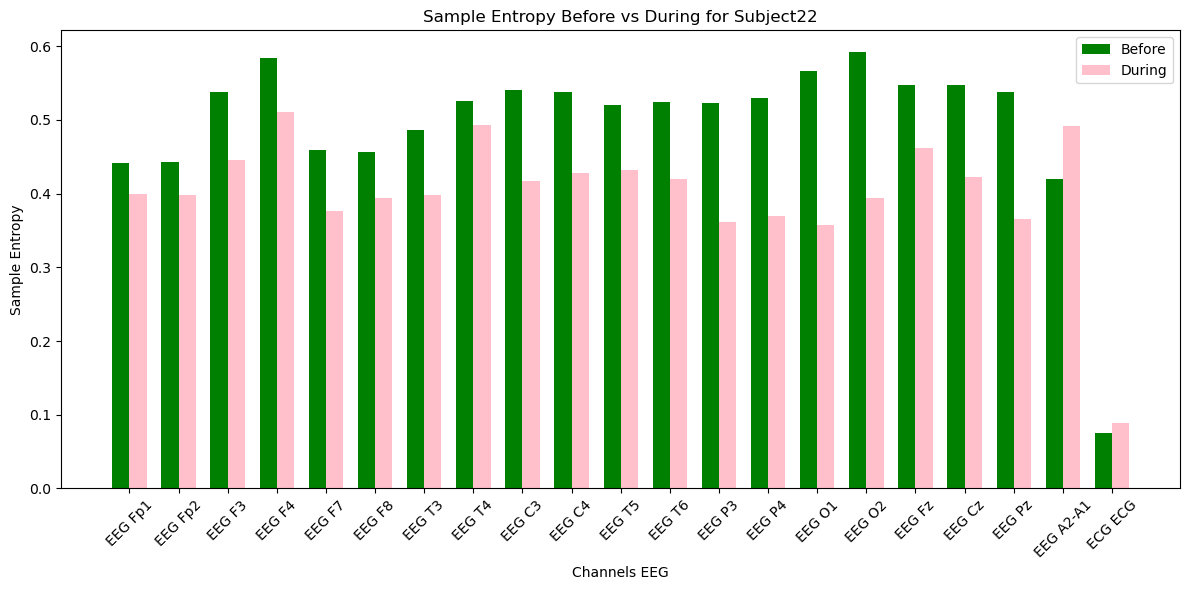

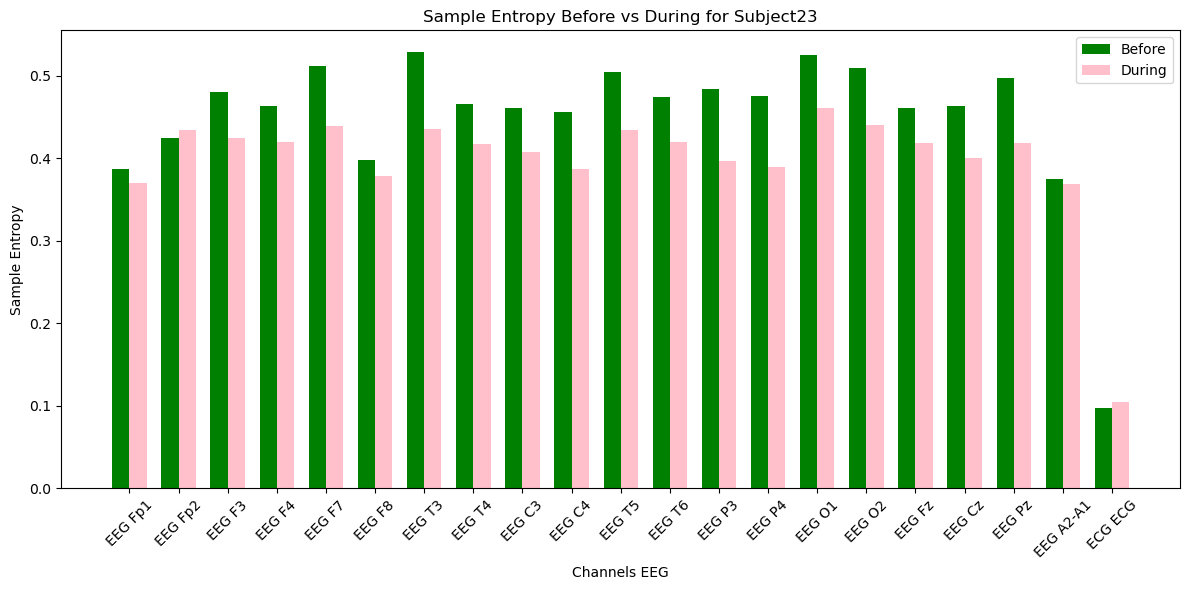

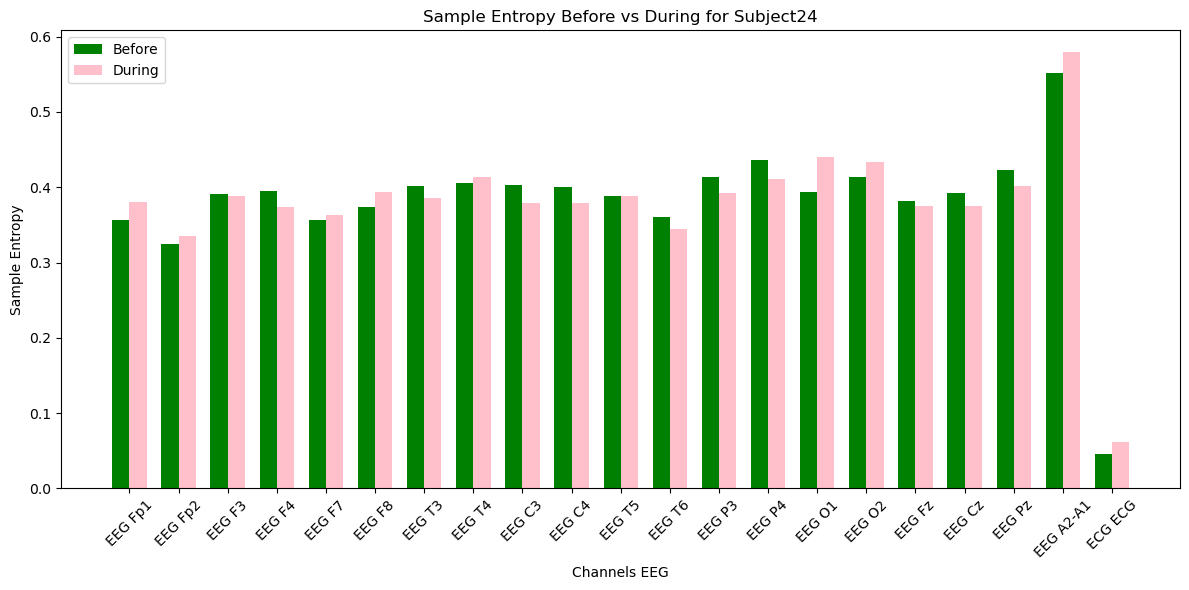

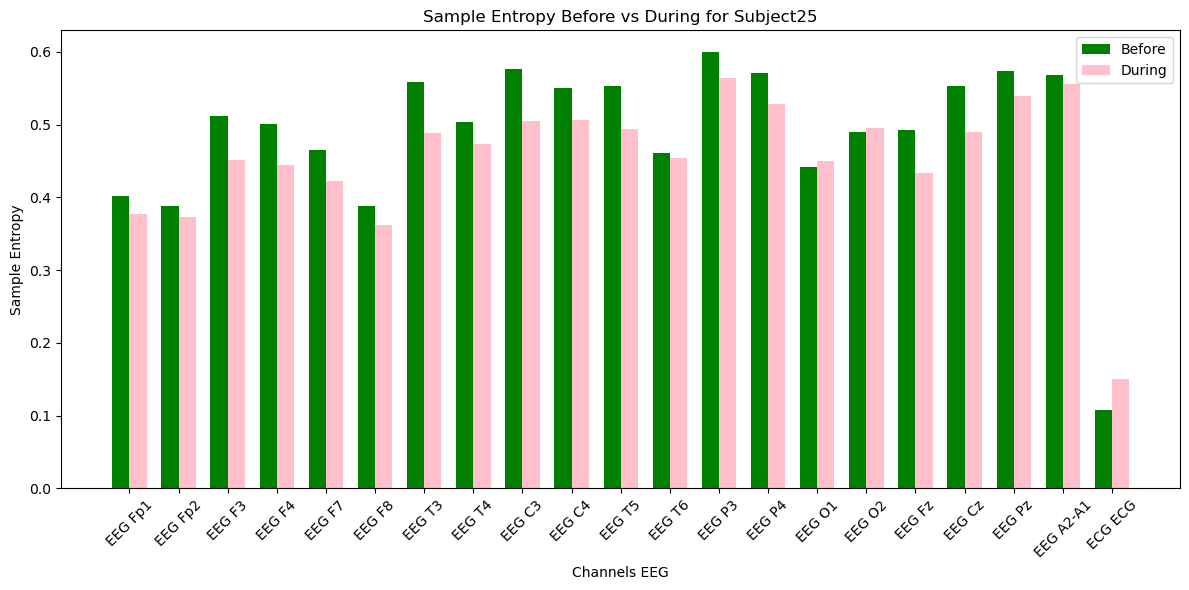

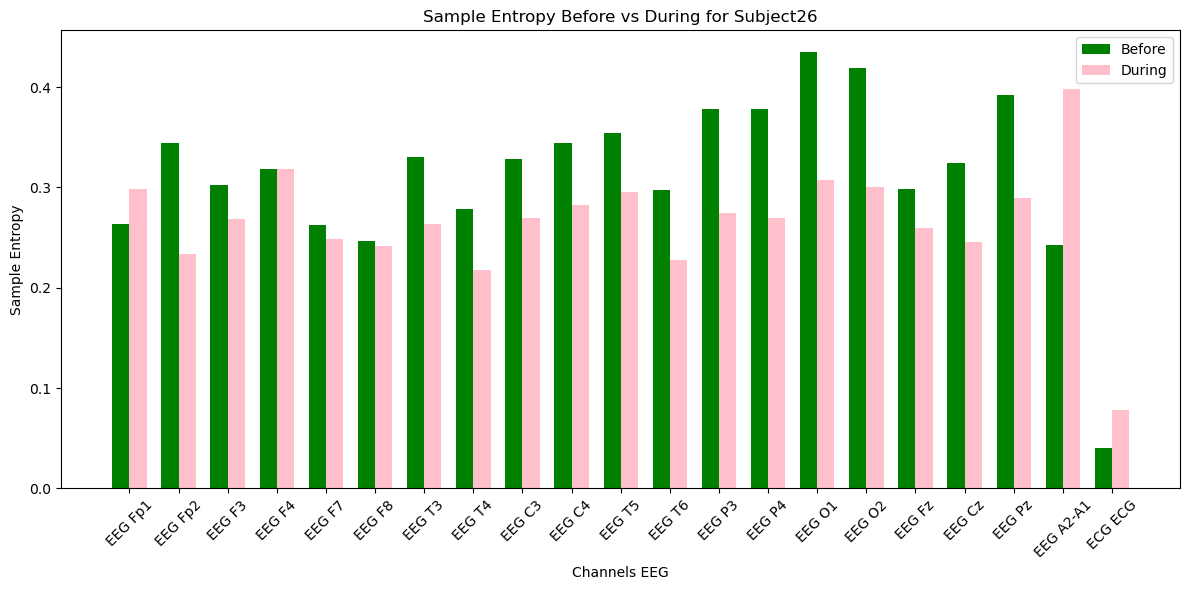

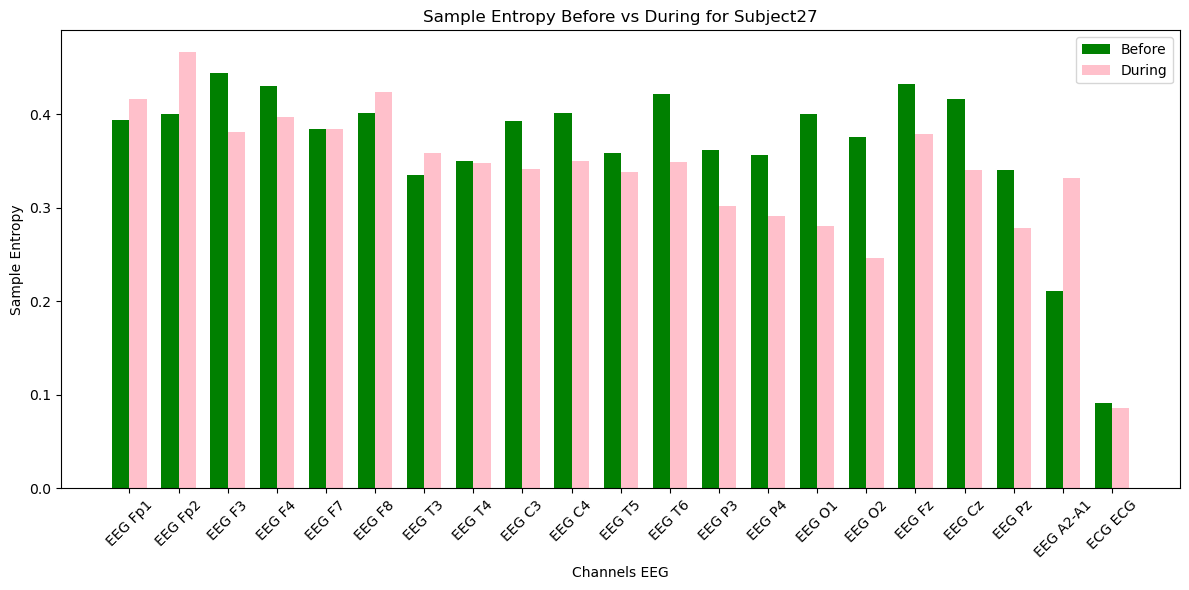

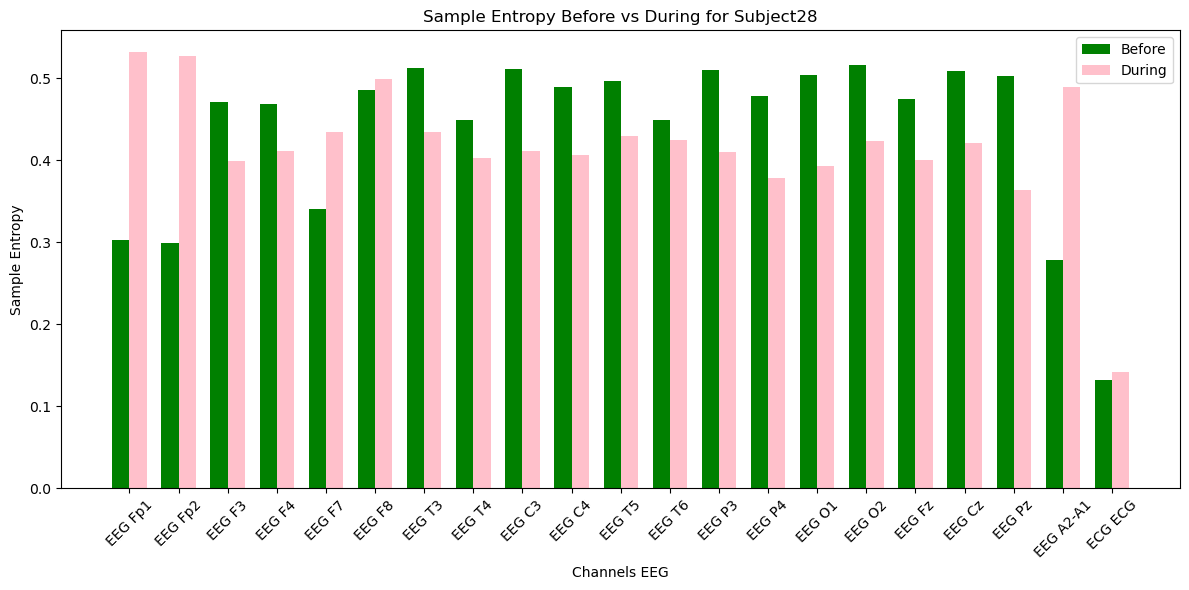

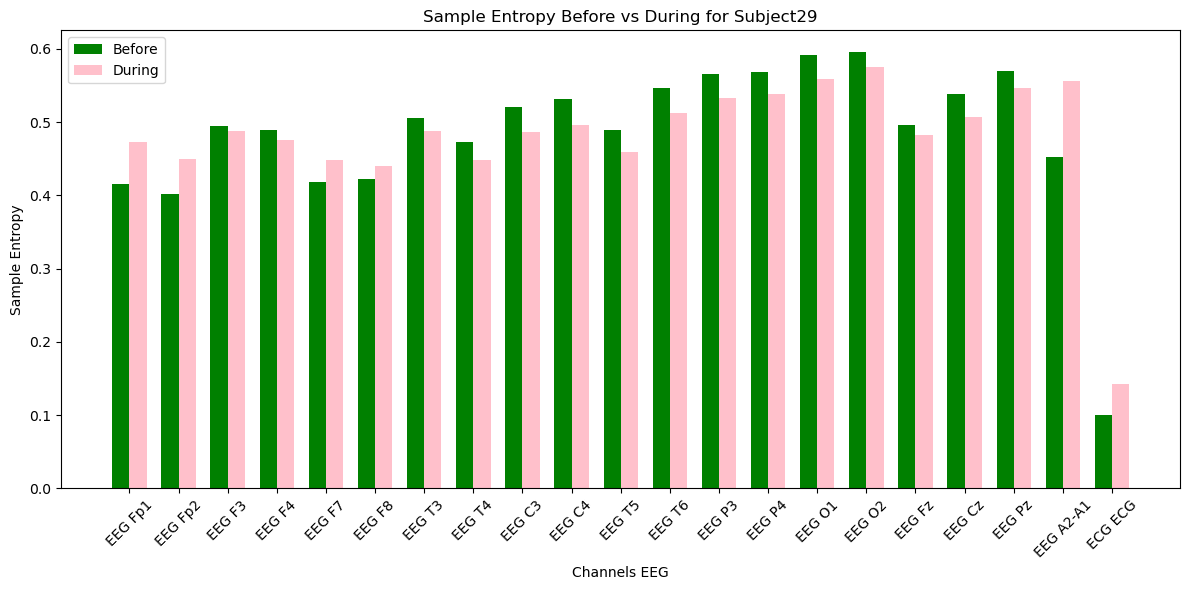

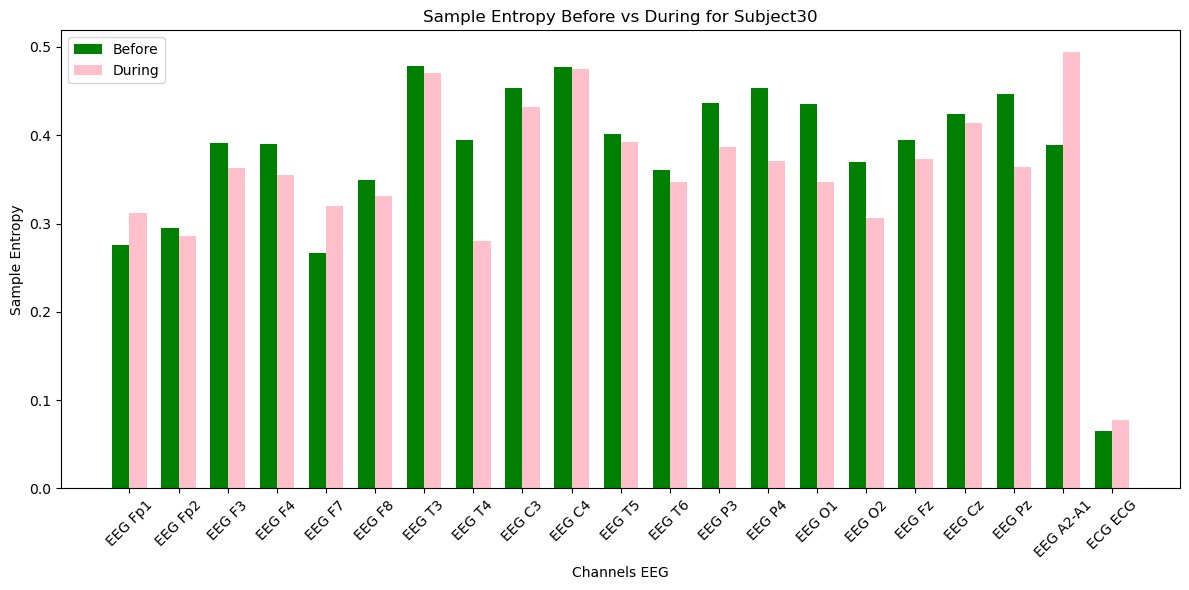

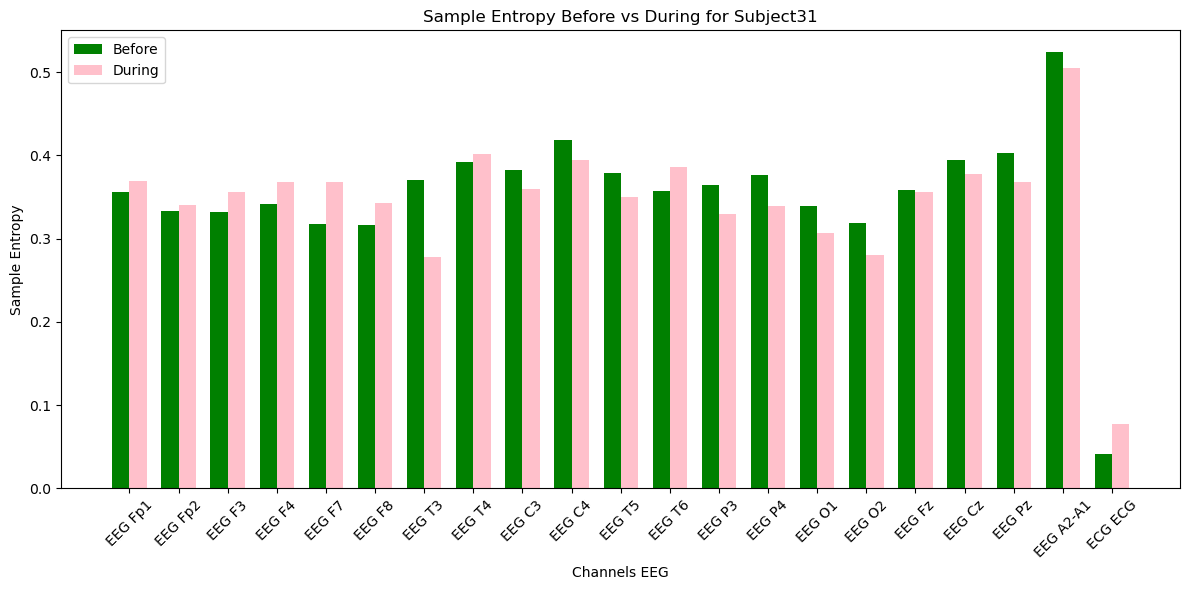

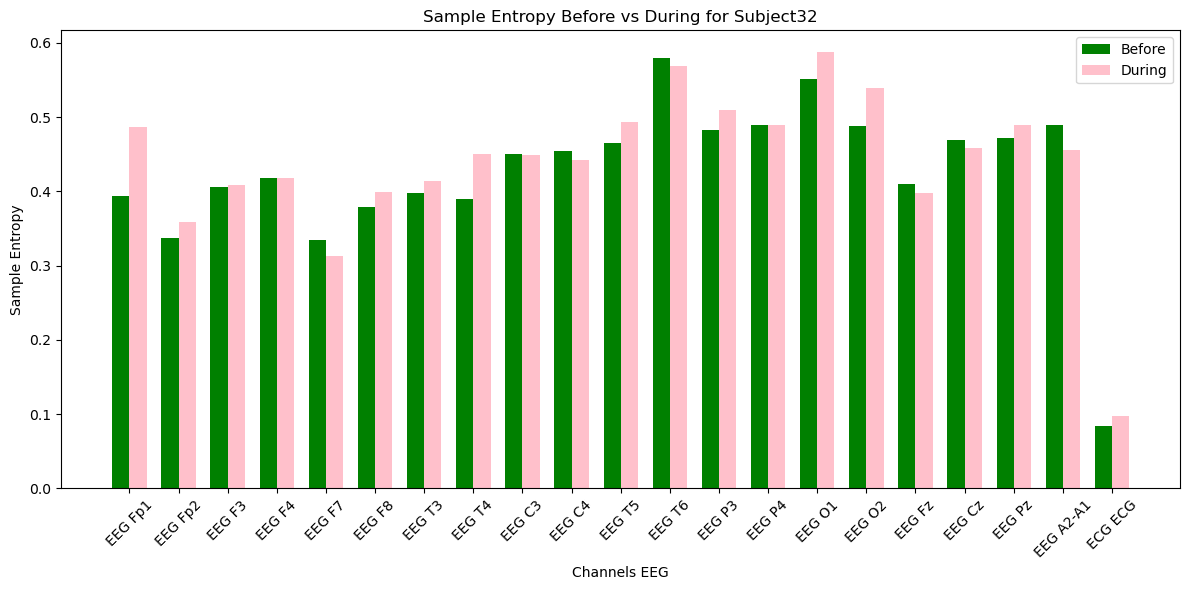

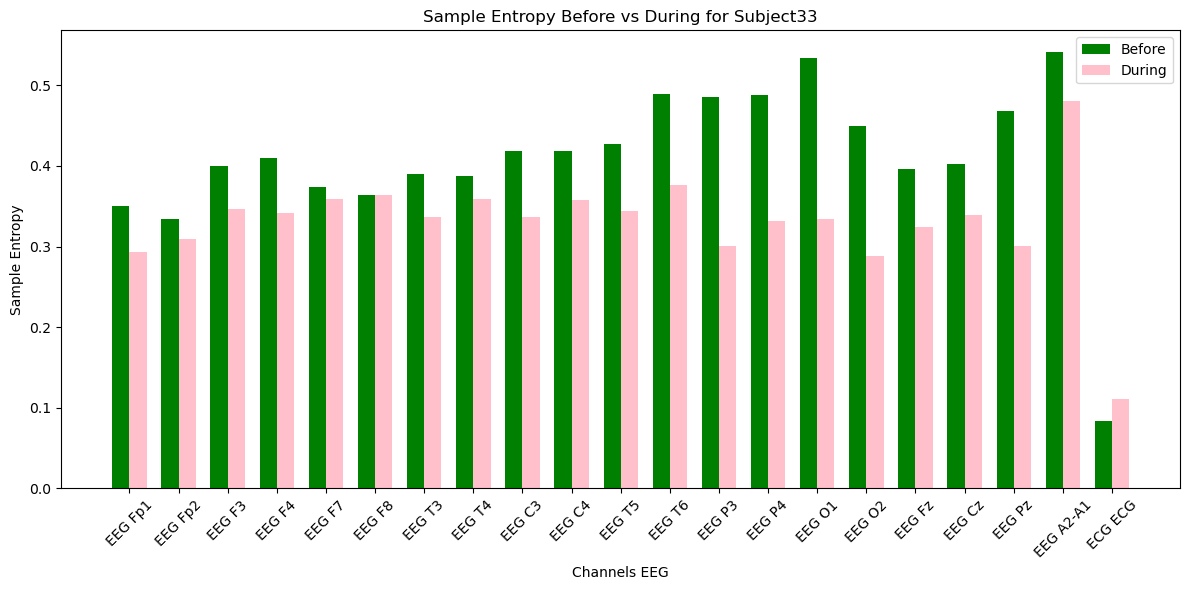

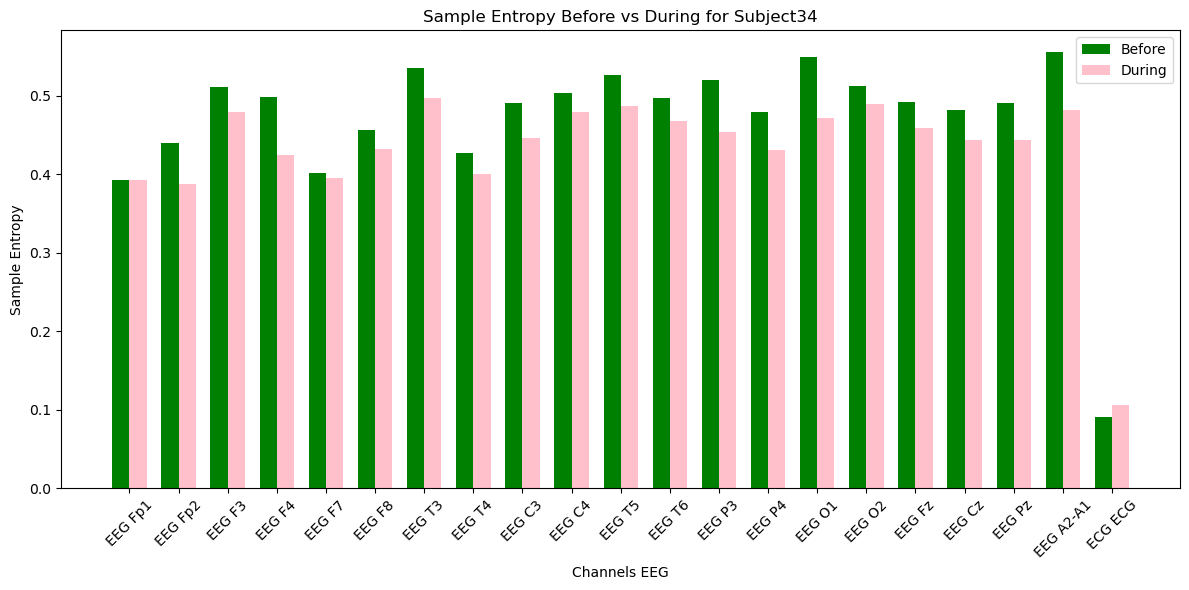

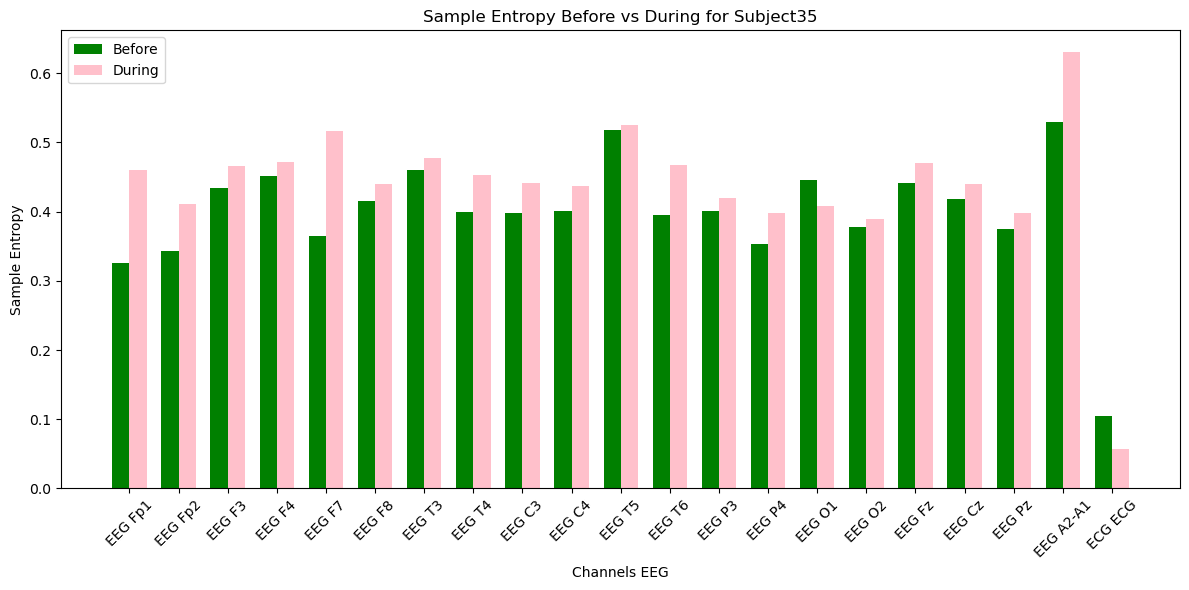

In [1]:
import pickle
import matplotlib.pyplot as plt

with open('all_channels_before.pkl', 'rb') as f:
    results_before = pickle.load(f)

with open('all_channels_during.pkl', 'rb') as f:
    results_during = pickle.load(f)

names_before = list(results_before.keys())
names_during = list(results_during.keys())


# Compare data
for patient_a, patient_d in zip(names_before, names_during):
    patient_before = results_before[patient_a]
    patient_during = results_during[patient_d]

    patient_name = patient_a.split('.')[0].split('_')[0]
    
    channels = list(patient_during.keys())
    
    entropy_before = []
    entropy_during = []
    
    for channel in channels:
        entropy_before.append(patient_before[channel]['sample_entropy'])
        entropy_during.append(patient_during[channel]['sample_entropy'])
         

    fig, ax = plt.subplots(figsize=(12, 6))
    x = range(len(channels))
    bar_width = 0.35  
    
    ax.bar(x, entropy_before, bar_width, label='Before', color='green')  # Before
    ax.bar([i + bar_width for i in x], entropy_during, bar_width, label='During', color='pink')  # During
    
    ax.set_xlabel('Channels EEG')
    ax.set_ylabel('Sample Entropy')
    ax.set_title(f'Sample Entropy Before vs During for {patient_name}') 
    ax.set_xticks([i + bar_width / 2 for i in x])
    ax.set_xticklabels(channels, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()
